In [26]:
# All the imports are declared here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [9]:
names = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
         "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
         "Mitoses", "Class"]

In [11]:
dataframe = pd.read_csv("breast-cancer-wisconsin.data", names=names)
dataframe.replace('?', -999999, inplace=True)
dataframe['Bare Nuclei'] = pd.to_numeric(dataframe['Bare Nuclei'])

In [14]:
X = dataframe.drop(['Sample code number', 'Class'], axis=1)
y = dataframe['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
varying_number_tree_list = [100, 150, 200, 250]
varying_number_feature_list = [2, 4, 6, 8] 

best_accuracies = []

In [34]:
for features in varying_number_feature_list:
    accuracies = []
    for trees in varying_number_tree_list:
        classifier = RandomForestClassifier(n_estimators=trees, max_features=features, oob_score=True, random_state=42)
        classifier.fit(X_train, y_train)
        y_predicted = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_predicted)
        accuracies.append(accuracy)
    best_accuracy = max(accuracies)
    best_accuracies.append(best_accuracy)

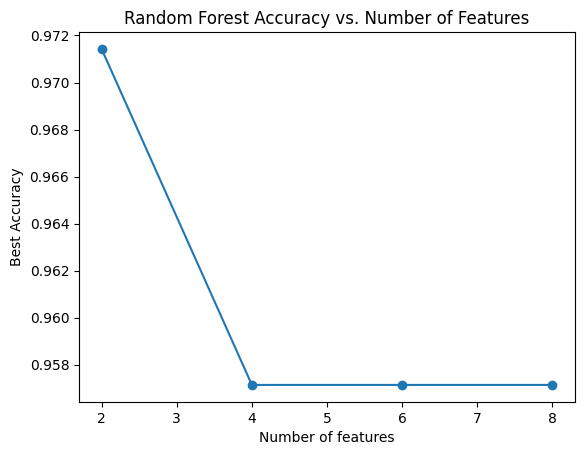

In [35]:
plt.plot(varying_number_feature_list, best_accuracies, marker = 'o')
plt.title('Random Forest Accuracy vs. Number of Features')
plt.xlabel('Number of features')
plt.ylabel('Best Accuracy')
plt.show()

In [36]:
optimal_number_features = varying_number_feature_list[best_accuracies.index(max(best_accuracies))]
optimal_number_trees = varying_number_tree_list[best_accuracies.index(max(best_accuracies))]

classifier_optimal = RandomForestClassifier(n_estimators=optimal_number_trees, max_features=optimal_number_features, oob_score=True, random_state=42)
classifier_optimal.fit(X_train, y_train)


RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

In [37]:
feature_importance = classifier_optimal.feature_importances_
mi_values = mutual_info_classif(X, y, random_state=42)

feature_importance_comparison = pd.DataFrame({'Feature': X.columns, 'Feature Importance': feature_importance, 'MI Value': mi_values})
print(feature_importance_comparison)

                       Feature  Feature Importance  MI Value
0              Clump Thickness            0.064694  0.316282
1      Uniformity of Cell Size            0.257510  0.464288
2     Uniformity of Cell Shape            0.216619  0.455681
3            Marginal Adhesion            0.049136  0.319405
4  Single Epithelial Cell Size            0.076927  0.351581
5                  Bare Nuclei            0.149641  0.402799
6              Bland Chromatin            0.092721  0.379849
7              Normal Nucleoli            0.085635  0.328189
8                      Mitoses            0.007117  0.133616


In [38]:
correlation = feature_importance_comparison['Feature Importance'].corr(feature_importance_comparison['MI Value'])

print(f"Correlation between Feature Importance and MI values: {correlation}")


Correlation between Feature Importance and MI values: 0.8722692467474289
